In [1]:
import pandas as pd
import numpy as np
import talib as ta
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib import rcParams
import random
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
data=pd.read_csv(r"C:\Users\mmehu\india.csv")
RFC=RandomForestClassifier()
RFR=RandomForestRegressor()


In [2]:
def Scaler(x):
    a=x-x.min()
    b=x.max()-x.min()
    c=-1+2*a/b
    return np.array(c)

In [3]:
stock_data= pd.read_csv('india.csv',parse_dates=['Date'])
stockdata=stock_data.iloc[::-1]


In [4]:
stockdata

,Date,Price,Open,High,Low,Vol.,Change %
2498,2010-05-13,"5,178.90","5,157.55","5,212.70","5,147.95",179.38M,0.43%
2497,2010-05-14,"5,093.50","5,180.55","5,192.75","5,070.95",144.38M,-1.65%
2496,2010-05-17,"5,059.90","5,093.90","5,094.55","4,966.25",169.31M,-0.66%
2495,2010-05-18,"5,066.20","5,059.55","5,105.20","5,024.25",137.03M,0.12%
2494,2010-05-19,"4,919.65","5,065.10","5,065.10","4,908.15",212.95M,-2.89%
...,...,...,...,...,...,...,...
4,2020-06-08,"10,167.45","10,326.75","10,328.50","10,120.25",936.49K,0.25%
3,2020-06-09,"10,046.65","10,181.15","10,291.15","10,021.45",754.22K,-1.19%
2,2020-06-10,"10,116.15","10,072.60","10,148.75","10,036.85",632.38K,0.69%
1,2020-06-11,"9,902.00","10,094.10","10,112.05","9,885.05",715.45K,-2.12%


In [5]:
stockdata=stockdata.reset_index(drop=True)
date=stockdata.Date
[stockdata]


[           Date      Price       Open       High        Low     Vol. Change %
 0    2010-05-13   5,178.90   5,157.55   5,212.70   5,147.95  179.38M    0.43%
 1    2010-05-14   5,093.50   5,180.55   5,192.75   5,070.95  144.38M   -1.65%
 2    2010-05-17   5,059.90   5,093.90   5,094.55   4,966.25  169.31M   -0.66%
 3    2010-05-18   5,066.20   5,059.55   5,105.20   5,024.25  137.03M    0.12%
 4    2010-05-19   4,919.65   5,065.10   5,065.10   4,908.15  212.95M   -2.89%
 ...         ...        ...        ...        ...        ...      ...      ...
 2494 2020-06-08  10,167.45  10,326.75  10,328.50  10,120.25  936.49K    0.25%
 2495 2020-06-09  10,046.65  10,181.15  10,291.15  10,021.45  754.22K   -1.19%
 2496 2020-06-10  10,116.15  10,072.60  10,148.75  10,036.85  632.38K    0.69%
 2497 2020-06-11   9,902.00  10,094.10  10,112.05   9,885.05  715.45K   -2.12%
 2498 2020-06-12   9,972.90   9,544.95   9,996.05   9,544.35  796.31K    0.72%
 
 [2499 rows x 7 columns]]

In [6]:
stockdata= stockdata.drop(['Date','Change %','Vol.'],axis=1)
stockdata

,Price,Open,High,Low
0,"5,178.90","5,157.55","5,212.70","5,147.95"
1,"5,093.50","5,180.55","5,192.75","5,070.95"
2,"5,059.90","5,093.90","5,094.55","4,966.25"
3,"5,066.20","5,059.55","5,105.20","5,024.25"
4,"4,919.65","5,065.10","5,065.10","4,908.15"
...,...,...,...,...
2494,"10,167.45","10,326.75","10,328.50","10,120.25"
2495,"10,046.65","10,181.15","10,291.15","10,021.45"
2496,"10,116.15","10,072.60","10,148.75","10,036.85"
2497,"9,902.00","10,094.10","10,112.05","9,885.05"


In [7]:
for stockdata in [stockdata]:
    for columns in stockdata.columns :
        stockdata[columns] = stockdata[columns].apply(lambda x : re.sub(r'[^0-9.]+','',x))

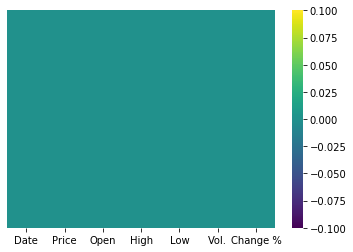

In [8]:
sns.heatmap(stock_data.isnull(), yticklabels=False, cmap='viridis')

In [9]:
#data=data.replace(0.0,np.NAN)

In [10]:
#data.fillna(data.mean(), inplace=True)

In [11]:
stockdata

,Price,Open,High,Low
0,5178.90,5157.55,5212.70,5147.95
1,5093.50,5180.55,5192.75,5070.95
2,5059.90,5093.90,5094.55,4966.25
3,5066.20,5059.55,5105.20,5024.25
4,4919.65,5065.10,5065.10,4908.15
...,...,...,...,...
2494,10167.45,10326.75,10328.50,10120.25
2495,10046.65,10181.15,10291.15,10021.45
2496,10116.15,10072.60,10148.75,10036.85
2497,9902.00,10094.10,10112.05,9885.05


In [169]:
close = np.array(stockdata['Price']).astype(float)
high =np.array(stockdata['High']).astype(float)
low =np.array(stockdata['Low']).astype(float)


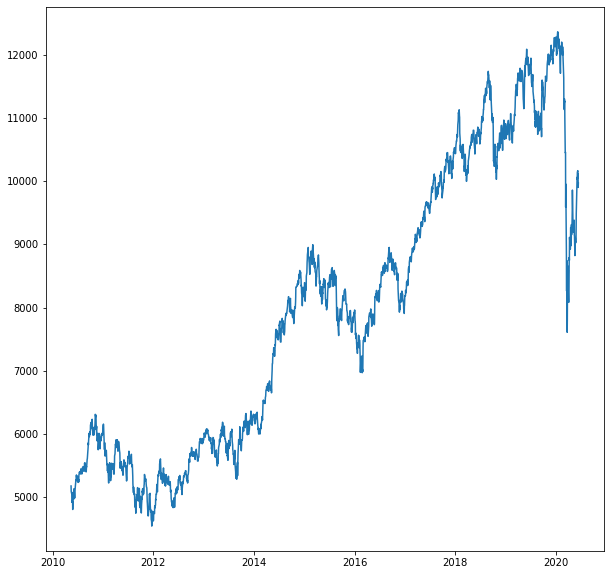

In [13]:
dict={"Date":date,"Close":close}
ts=pd.DataFrame(data=dict)
ts['Date'] = pd.to_datetime(ts['Date'], format="%Y/%m/%d")
ts.set_index(ts["Date"],drop=True,inplace=True)
ts.drop(["Date"],axis=1,inplace=True)
rcParams['figure.figsize']=10,10
plt.plot(ts);

# INDICATORS

In [14]:
sma=ta.SMA(close, 20)
ema=ta.EMA(close, 12)
macd, macdsignal, macdhist=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9) #MACD>MSIG= BUY signal
rsi=ta.RSI(close, timeperiod=14)
slowk,slowd=ta.STOCH(high,low,close,fastk_period=14)
roc = ta.ROC(close, timeperiod=10)
willr=ta.WILLR(high, low, close) #above -20 overbought below -80 oversold
trix = ta.TRIX(close, timeperiod=5)
sar=ta.SAR(high,low)
cci=ta.CCI(high,low,close)
atr=ta.ATR(high,low,close,timeperiod=14)
adx=ta.ADX(high,low,close,timeperiod=14)

In [15]:
dict={"Close":close,"SMA":sma,"EMA":ema,"MACD":macd, 
      "RSI":rsi,"WillR":willr,"Slowk":slowk,"Slowd":slowd,"ROC":roc,"TRIX":trix,'SAR':sar,'CCI':cci,'ATR':atr,'ADX':adx}
featuredata=pd.DataFrame(data=dict)
featuredata.dropna(inplace=True)

In [16]:
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX
33,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832
34,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491
35,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317
36,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250
37,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585
2495,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472
2496,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866
2497,9902.00,9543.9350,9861.221901,231.308566,58.019629,-31.361447,77.876071,83.861990,4.340313,0.543956,9803.996749,37.590646,230.845979,19.970076


In [17]:
featuredata["ups and downs"]=featuredata["Close"].shift(-1)-featuredata["Close"]
featuredata


,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs
33,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832,56.35
34,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491,-61.10
35,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317,-14.30
36,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250,-1.20
37,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117,53.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585,-120.80
2495,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472,69.50
2496,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866,-214.15
2497,9902.00,9543.9350,9861.221901,231.308566,58.019629,-31.361447,77.876071,83.861990,4.340313,0.543956,9803.996749,37.590646,230.845979,19.970076,70.90


In [18]:
featuredata["direction"]=featuredata.apply(lambda x:1 if x["ups and downs"]>0 else (-1 if x["ups and downs"]<0 else 0), axis=1) 
#featuredata["direction"]=featuredata.apply(lambda x:-1 if x["ups and downs"]<0 else 0, axis=1)
#featuredata.dropna(inplace=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
33,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832,56.35,1
34,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491,-61.10,-1
35,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317,-14.30,-1
36,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250,-1.20,-1
37,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117,53.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585,-120.80,-1
2495,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472,69.50,1
2496,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866,-214.15,-1
2497,9902.00,9543.9350,9861.221901,231.308566,58.019629,-31.361447,77.876071,83.861990,4.340313,0.543956,9803.996749,37.590646,230.845979,19.970076,70.90,1


In [19]:
featuredata=featuredata.reset_index(drop=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
0,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832,56.35,1
1,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491,-61.10,-1
2,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317,-14.30,-1
3,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250,-1.20,-1
4,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117,53.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585,-120.80,-1
2462,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472,69.50,1
2463,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866,-214.15,-1
2464,9902.00,9543.9350,9861.221901,231.308566,58.019629,-31.361447,77.876071,83.861990,4.340313,0.543956,9803.996749,37.590646,230.845979,19.970076,70.90,1


In [20]:
featuredata1=featuredata.dropna()
featuredata1

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,ups and downs,direction
0,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832,56.35,1
1,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491,-61.10,-1
2,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317,-14.30,-1
3,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250,-1.20,-1
4,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117,53.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,10142.15,9385.8625,9688.724281,210.611711,68.083198,-2.600197,92.762097,93.183381,11.375704,1.038566,9324.040850,110.894552,239.952525,17.148876,25.30,1
2461,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585,-120.80,-1
2462,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472,69.50,1
2463,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866,-214.15,-1


In [21]:
#featuredata["Closelag1"]=featuredata.Close.shift(1)
#featuredata["Closelag2"]=featuredata.Close.shift(2)
#featuredata.dropna(inplace=True)

In [245]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
# Create a based model
RFC = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, verbose = 2)

In [258]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]
RescaledX=Scaler(X)
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test,y_pred)

0.49594594594594593

In [247]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.2min finished


{'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [260]:
grid_search.best_score_

0.51430781129157

# GA

In [261]:
RFC=RandomForestClassifier( n_estimators= 100,
 n_jobs=-1)

In [22]:
class GeneticSelector():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            try:
                self.estimator.fit(X_train.iloc[:,chromosome],y_train)
                predictions = self.estimator.predict(X_test.iloc[:,chromosome])            
                scores.append(accuracy_score(y_test,predictions))
            except:
                continue
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
        random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)            
        return self
    
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [2209]:
X=featuredata1[['EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]

In [2210]:
sel = GeneticSelector(estimator=RFC,n_gen=20, size=90, n_best=25, n_rand=25, 
                      n_children=25, mutation_rate=0.05)



In [2211]:
sel.fit(X,y)

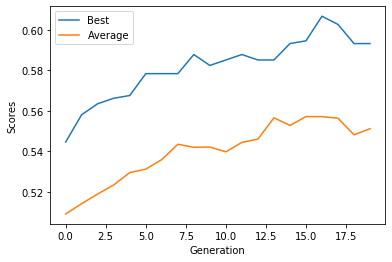

In [2212]:
sel.plot_scores()

In [2213]:
sel.scores_best

[0.5445945945945946,
 0.5581081081081081,
 0.5635135135135135,
 0.5662162162162162,
 0.5675675675675675,
 0.5783783783783784,
 0.5783783783783784,
 0.5783783783783784,
 0.5878378378378378,
 0.5824324324324325,
 0.5851351351351352,
 0.5878378378378378,
 0.5851351351351352,
 0.5851351351351352,
 0.5932432432432433,
 0.5945945945945946,
 0.6067567567567568,
 0.6027027027027027,
 0.5932432432432433,
 0.5932432432432433]

In [2214]:
sel.chromosomes_best

[array([False,  True,  True,  True,  True,  True,  True,  True, False,
        False,  True,  True]),
 array([ True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False]),
 array([ True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False]),
 array([False, False,  True,  True,  True,  True,  True, False, False,
         True,  True,  True]),
 array([False, False,  True,  True,  True,  True,  True, False, False,
         True,  True,  True]),
 array([False, False, False,  True,  True,  True, False, False, False,
         True,  True,  True]),
 array([False, False,  True,  True,  True, False,  True, False, False,
         True, False,  True]),
 array([False, False,  True,  True,  True, False,  True, False, False,
         True, False,  True]),
 array([False, False,  True,  True,  True, False,  True, False, False,
         True, False,  True]),
 array([False, False,  True,  True,  True, False,  True, False, False,
         Tr

# PCA

In [352]:
X=featuredata1[['EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]

In [353]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
x_pc=pca.fit_transform(X)

In [354]:
df=pd.DataFrame(data=x_pc,columns=["PC1","PC2","PC3"])
df['direction']=featuredata1['direction']
df

,PC1,PC2,PC3,direction
0,-7063.381581,-198.123254,8.250913,1
1,-7039.283809,-194.511005,25.292188,1
2,-7013.865401,-192.540220,35.937653,-1
3,-6997.219648,-188.672436,40.791807,1
4,-6976.053397,-190.494126,40.279293,-1
...,...,...,...,...
2444,3791.811847,242.893268,744.644722,1
2445,3971.230400,252.428506,862.939611,-1
2446,4144.459190,246.481707,940.246530,1
2447,4307.828168,245.667517,1004.701343,-1


In [361]:
X=df[["PC1","PC2","PC3"]]
RescaledX=Scaler(X)
y=df["direction"]
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)
RFC.fit(X_train,y_train)
predictions = RFC.predict(X_test)            
accuracy_score(y_test,predictions)

0.527891156462585

# PCA+GA

In [203]:
X=df[["PC1","PC2","PC3"]]
y=df["direction"]

In [2810]:
sel1 = GeneticSelector(estimator=RFC,n_gen=30, size=10, n_best=5, n_rand=5, 
                      n_children=5, mutation_rate=0.05)

In [2811]:
sel1.fit(X,y)

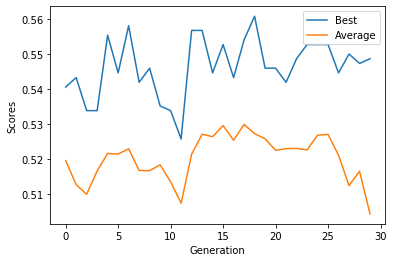

In [2812]:
sel1.plot_scores()

In [2813]:
sel1.scores_best

[0.5405405405405406,
 0.5432432432432432,
 0.5337837837837838,
 0.5337837837837838,
 0.5554054054054054,
 0.5445945945945946,
 0.5581081081081081,
 0.5418918918918919,
 0.5459459459459459,
 0.5351351351351351,
 0.5337837837837838,
 0.5256756756756756,
 0.5567567567567567,
 0.5567567567567567,
 0.5445945945945946,
 0.5527027027027027,
 0.5432432432432432,
 0.5540540540540541,
 0.5608108108108109,
 0.5459459459459459,
 0.5459459459459459,
 0.5418918918918919,
 0.5486486486486486,
 0.5527027027027027,
 0.5527027027027027,
 0.5527027027027027,
 0.5445945945945946,
 0.55,
 0.5472972972972973,
 0.5486486486486486]

# Direction

In [2814]:
best_chromosome=[False, False,  True,  True,  True, False, False, False, False,
         True, False,  True]
X=featuredata[['EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata["direction"]
X=pd.DataFrame(data=Scaler(X))
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [2815]:
RFC=RandomForestClassifier( n_estimators= 100,n_jobs=-1)

In [2816]:
RFC.fit(X_train.iloc[:,best_chromosome],y_train)
predictions = RFC.predict(X_test.iloc[:,best_chromosome])  

In [2817]:
predictions=pd.DataFrame(data=predictions,columns=['direction'])


In [2818]:
y_test.tail(11),predictions.tail(11)

(2455    1
 2456    1
 2457    1
 2458   -1
 2459    1
 2460    1
 2461   -1
 2462    1
 2463   -1
 2464    1
 2465    0
 Name: direction, dtype: int64,
      direction
 729          1
 730          1
 731          1
 732         -1
 733         -1
 734         -1
 735         -1
 736         -1
 737          1
 738          1
 739         -1)

# Price

In [2421]:
RFR=RandomForestRegressor(n_estimators=100,n_jobs=-1)

# GA for regression

In [2578]:
class GeneticSelectorRegression():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            try:
                self.estimator.fit(X_train.iloc[:,chromosome],y_train)
                predictions = self.estimator.predict(X_test.iloc[:,chromosome])            
                scores.append(self.estimator.score(X_test.iloc[:,chromosome],y_test))
            except:
                continue
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
        random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)            
        return self
    
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [1908]:
X=featuredata1[['EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1['ups and downs']

In [1915]:
sel2=GeneticSelectorRegression(estimator=RFR,n_gen=20, size=30, n_best=10, n_rand=10, 
                      n_children=10, mutation_rate=0.05)

In [1916]:
sel2.fit(X,y)

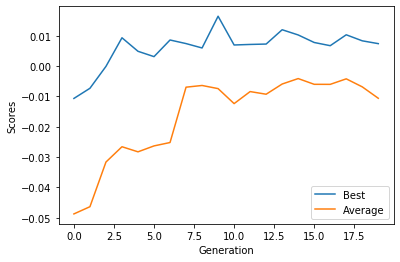

In [1917]:
sel2.plot_scores()

In [1918]:
sel2.scores_best

[-0.010645710474944226,
 -0.007300548572255483,
 -7.982613564538887e-05,
 0.009353281860097207,
 0.004895684157026903,
 0.003137166194819518,
 0.0086208859405833,
 0.007437605687924064,
 0.005992088449346732,
 0.01645505050120777,
 0.006976245960604199,
 0.007156690831999545,
 0.007283853754036285,
 0.012005439544456984,
 0.010286228988509283,
 0.0078002508535496284,
 0.006744924812393971,
 0.01033908335017586,
 0.008350323529473735,
 0.007419617540346479]

# PSO

In [262]:
X=featuredata1[['EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata1["direction"]

In [263]:
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

C:\Users\mmehu\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


RESULT:
Optimal solution: [98.02089788198352, 97.49521568797235, 2, 6, 10]
Objective function value: 0.5608108108108109


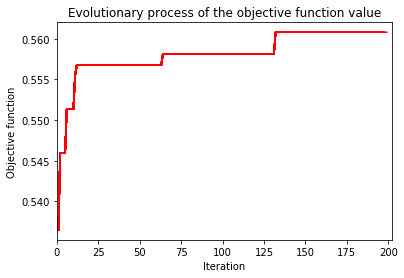

In [2601]:
import random
import time
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
def objective_function(O):
    a = int(O[0])
    b = int(O[1])
    c = int(O[2])
    d = int(O[3])
    e = int(O[4])
    RFC=RandomForestClassifier( n_estimators= a, max_depth=b, max_features= c, min_samples_leaf= d, min_samples_split= e)
    RFC.fit(X_train,y_train)
    predictions=RFC.predict(X_test)    
    z = accuracy_score(y_test,predictions)
    return z
 
bounds = [(80, 150),(80,130),(2,5),(3,6),(6,10)]  # upper and lower bounds of variables[(Xmin,Xmax),(Ymin,ymax)]
nv = 5  # number of variables
mm = 1  # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# PARAMETERS OF PSO
particle_size = 120  # number of particles
iterations = 200  # max number of iterations
w = 0.8  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant
 
# Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()
plt.title('Evolutionary process of the objective function value')
plt.xlabel("Iteration")
plt.ylabel("Objective function")
# ------------------------------------------------------------------------------
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position = initial_fitness  # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(
                random.randint(bounds[i][0], bounds[i][1]))  # generate random initial position
            self.particle_velocity.append(random.uniform(-1, 1))  # generate random initial velocity
 
    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()
 
            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity
 
    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]
 
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A = []
 
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
 
            A.append(fitness_global_best_particle_position)  # record the best fitness
            # Visualization
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=max(0, i - iterations), right=i + 3)
            time.sleep(0.001)
        print('RESULT:')
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
# ------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf")  # for minimization problem
if mm == 1:
    initial_fitness = -float("inf")  # for maximization problem
# ------------------------------------------------------------------------------
# Main PSO
PSO(objective_function, bounds, particle_size, iterations)
plt.show()

# pso with best features from GA

In [265]:
best_chromosome=[False, False,  True,  True,  True, False, False, False, False,
         True, False,  True]
X=featuredata[['EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata["direction"]
X=pd.DataFrame(data=Scaler(X))
X_train = X[:int(X.shape[0]*0.7)]
X_train=X_train.iloc[:,best_chromosome]
X_test = X[int(X.shape[0]*0.7):]
X_test=X_test.iloc[:,best_chromosome]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

C:\Users\mmehu\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


RESULT:
Optimal solution: [121.64726884157723, 126.52806099161704, 2.7186002305668935, 3.80719626085479, 10]
Objective function value: 0.6


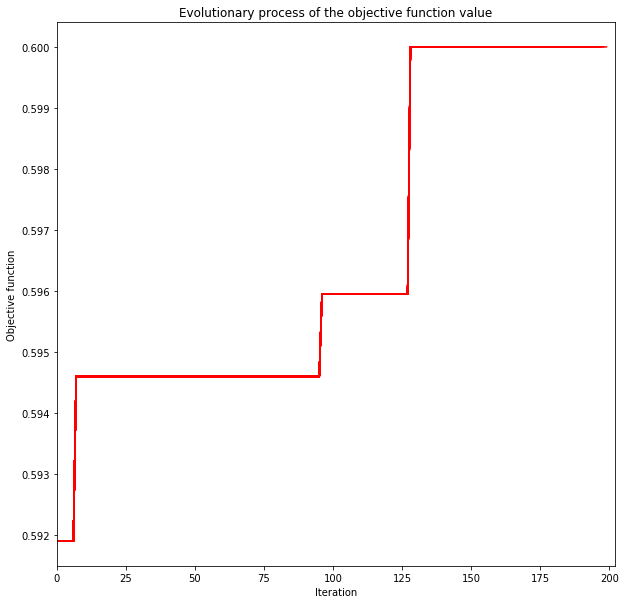

In [266]:
import random
import time
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
def objective_function(O):
    a = int(O[0])
    b = int(O[1])
    c = int(O[2])
    d = int(O[3])
    e = int(O[4])
    RFC=RandomForestClassifier(n_estimators= a, max_depth=b, max_features= c, min_samples_leaf= d, min_samples_split= e)
    RFC.fit(X_train,y_train)
    predictions=RFC.predict(X_test)    
    z = accuracy_score(y_test,predictions)
    return z
 
bounds = [(80, 150),(80,130),(2,5),(3,6),(6,10)]  # upper and lower bounds of variables[(Xmin,Xmax),(Ymin,ymax)]
nv = 5  # number of variables
mm = 1  # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# PARAMETERS OF PSO
particle_size = 120  # number of particles
iterations = 200  # max number of iterations
w = 0.8  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant
 
# Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()
plt.title('Evolutionary process of the objective function value')
plt.xlabel("Iteration")
plt.ylabel("Objective function")
# ------------------------------------------------------------------------------
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position = initial_fitness  # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(
                random.randint(bounds[i][0], bounds[i][1]))  # generate random initial position
            self.particle_velocity.append(random.uniform(-1, 1))  # generate random initial velocity
 
    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()
 
            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity
 
    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]
 
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A = []
 
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
 
            A.append(fitness_global_best_particle_position)  # record the best fitness
            # Visualization
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=max(0, i - iterations), right=i + 3)
            time.sleep(0.001)
        print('RESULT:')
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
# ------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf")  # for minimization problem
if mm == 1:
    initial_fitness = -float("inf")  # for maximization problem
# ------------------------------------------------------------------------------
# Main PSO
PSO(objective_function, bounds, particle_size, iterations)
plt.show()

# Wavelet transform

In [106]:
import pywt

In [107]:
close1=close[3:]
len(close1)

2496

In [108]:
[(ca3,cd3),(ca2,cd2),(ca1,cd1)] =pywt.swt(close1,'haar',level=3,norm=True)

In [109]:
dict={'CA1':ca1,'CD1':cd1,'CA2':ca2,'CD2':cd2,'CA3':ca3,'CD3':cd3}
coeff=pd.DataFrame(data=dict)

In [110]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(60).mean() #pd.rolling_mean(timeseries, window=90) #2 months
    rolstd = timeseries.rolling(60).std()   #pd.rolling_std(timeseries, window=90)   #2 months

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best') #location of label
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [111]:
CA1diff=coeff['CA1']-coeff['CA1'].shift(1)

In [112]:
CA1diff.dropna(inplace=True)

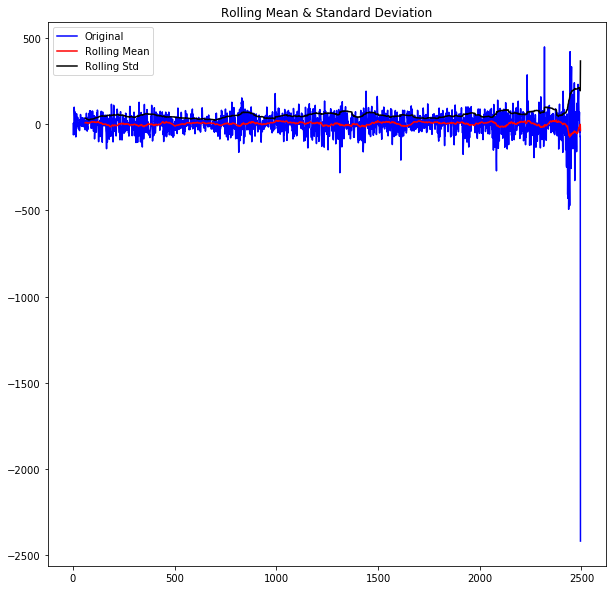

Results of Dickey-Fuller Test:
Test Statistic                -6.562499e+00
p-value                        8.313709e-09
#Lags Used                     2.700000e+01
Number of Observations Used    2.467000e+03
Critical Value (1%)           -3.433003e+00
Critical Value (5%)           -2.862712e+00
Critical Value (10%)          -2.567394e+00
dtype: float64


In [113]:
test_stationarity(CA1diff)

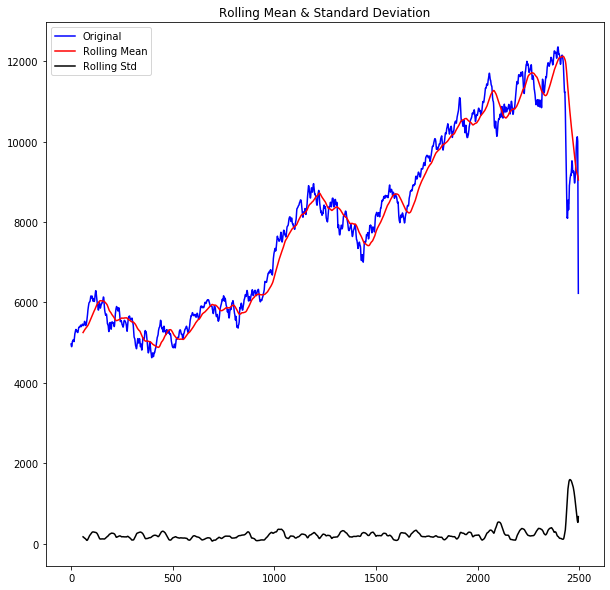

Results of Dickey-Fuller Test:
Test Statistic                   -1.420643
p-value                           0.572340
#Lags Used                       27.000000
Number of Observations Used    2468.000000
Critical Value (1%)              -3.433002
Critical Value (5%)              -2.862712
Critical Value (10%)             -2.567394
dtype: float64


In [114]:
test_stationarity(coeff['CA2'])

In [115]:
CA2diff=coeff['CA2']-coeff['CA2'].shift(1)


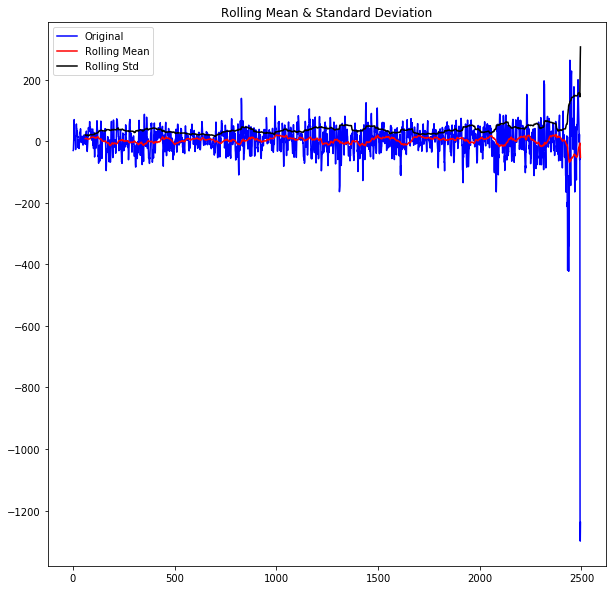

Results of Dickey-Fuller Test:
Test Statistic                -7.305733e+00
p-value                        1.303063e-10
#Lags Used                     2.700000e+01
Number of Observations Used    2.467000e+03
Critical Value (1%)           -3.433003e+00
Critical Value (5%)           -2.862712e+00
Critical Value (10%)          -2.567394e+00
dtype: float64


In [116]:
CA2diff.dropna(inplace=True)
test_stationarity(CA2diff)

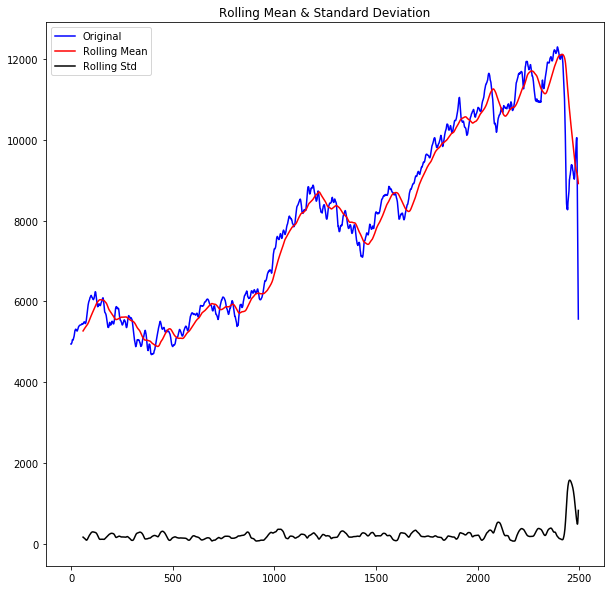

Results of Dickey-Fuller Test:
Test Statistic                   -1.451917
p-value                           0.557149
#Lags Used                       25.000000
Number of Observations Used    2470.000000
Critical Value (1%)              -3.433000
Critical Value (5%)              -2.862711
Critical Value (10%)             -2.567393
dtype: float64


In [117]:
test_stationarity(coeff['CA3'])

In [118]:
CA3diff=coeff['CA3']-coeff['CA3'].shift(1)


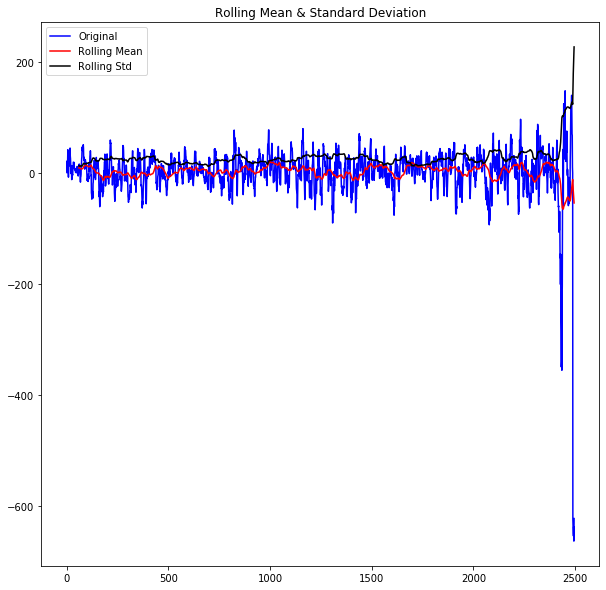

Results of Dickey-Fuller Test:
Test Statistic                -6.416385e+00
p-value                        1.836862e-08
#Lags Used                     2.400000e+01
Number of Observations Used    2.470000e+03
Critical Value (1%)           -3.433000e+00
Critical Value (5%)           -2.862711e+00
Critical Value (10%)          -2.567393e+00
dtype: float64


In [119]:
CA3diff.dropna(inplace=True)
test_stationarity(CA3diff)

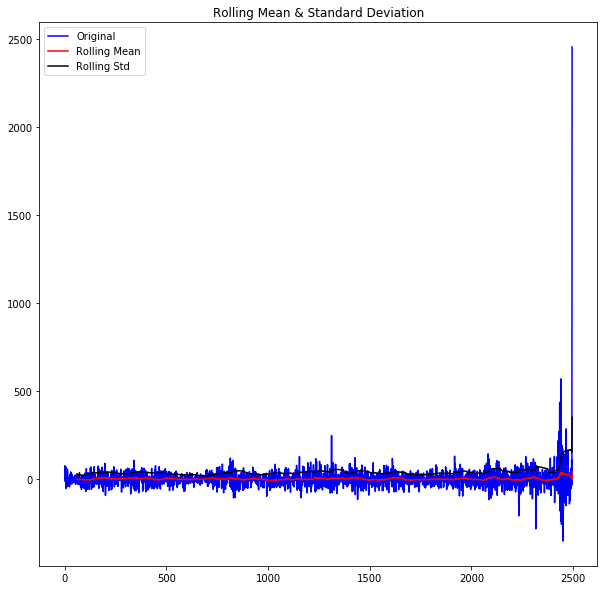

Results of Dickey-Fuller Test:
Test Statistic                -8.172586e+00
p-value                        8.543564e-13
#Lags Used                     2.300000e+01
Number of Observations Used    2.472000e+03
Critical Value (1%)           -3.432998e+00
Critical Value (5%)           -2.862710e+00
Critical Value (10%)          -2.567393e+00
dtype: float64


In [120]:
test_stationarity(coeff['CD1'])

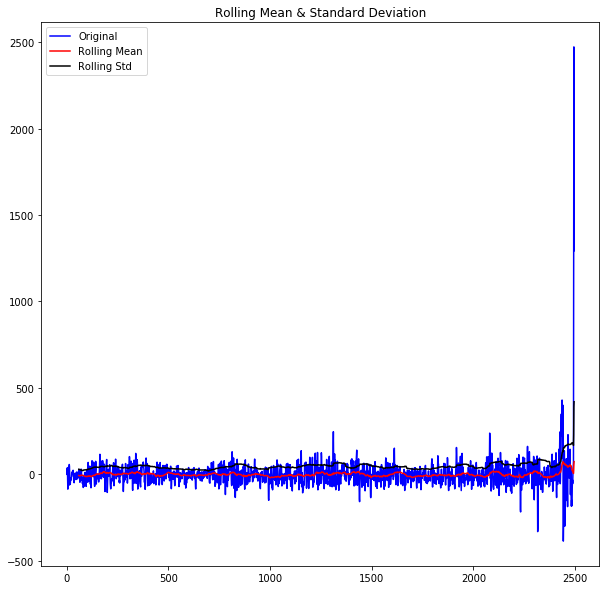

Results of Dickey-Fuller Test:
Test Statistic                -7.228432e+00
p-value                        2.024172e-10
#Lags Used                     2.700000e+01
Number of Observations Used    2.468000e+03
Critical Value (1%)           -3.433002e+00
Critical Value (5%)           -2.862712e+00
Critical Value (10%)          -2.567394e+00
dtype: float64


In [121]:
test_stationarity(coeff['CD2'])

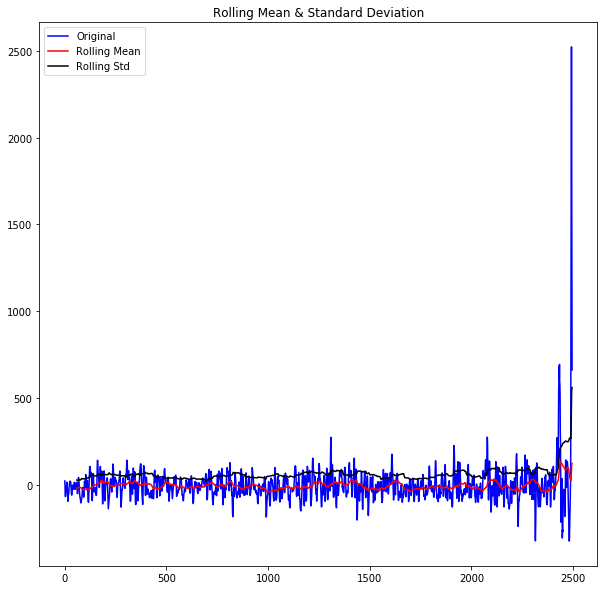

Results of Dickey-Fuller Test:
Test Statistic                -6.856790e+00
p-value                        1.640655e-09
#Lags Used                     2.700000e+01
Number of Observations Used    2.468000e+03
Critical Value (1%)           -3.433002e+00
Critical Value (5%)           -2.862712e+00
Critical Value (10%)          -2.567394e+00
dtype: float64


In [122]:
test_stationarity(coeff['CD3']) #stationary

In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
len(CA1diff),len(CA2diff),len(CA3diff),len(cd1)

(2495, 2495, 2495, 2496)

In [125]:
def laggen(series):
    dict={}
    for i in range(1,28):        
        j=series.shift(i)
        dict[i]=j
        dataframe=pd.DataFrame(data=dict)  
    dataframe['actualseries']=series
    return dataframe


In [126]:
lagCA1diff=laggen(CA1diff)
lagCA2diff=laggen(CA2diff)
lagCA3diff=laggen(CA3diff)

In [127]:
lagCD1=laggen(coeff['CD1'])
lagCD2=laggen(coeff['CD2'])
lagCD3=laggen(coeff['CD3'])


In [128]:
lagCA1diff.dropna(inplace=True)
lagCA2diff.dropna(inplace=True)
lagCA3diff.dropna(inplace=True)
lagCD1.dropna(inplace=True)
lagCD2.dropna(inplace=True)
lagCD3.dropna(inplace=True)

In [129]:
X=Scaler(lagCA1diff.drop('actualseries',axis=1))
y=lagCA1diff['actualseries']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=False)
RFR.fit(X_train,y_train)
predictionsCA1diff=RFR.predict(X_test)
predictions1=RFR.predict(X_train)
mean_squared_error(y_test,predictionsCA1diff,squared=False)

107.000640569059

In [130]:
mean_squared_error(y_train,predictions1,squared=False)

15.19851725252511

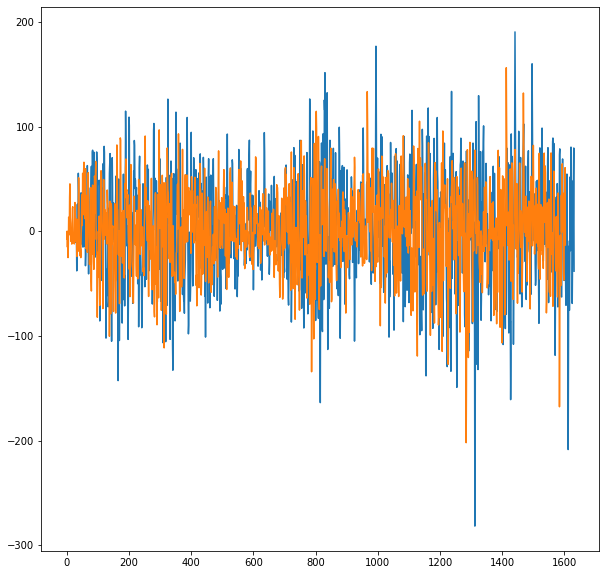

In [131]:
plt.plot(y_train)
plt.plot(predictions1)

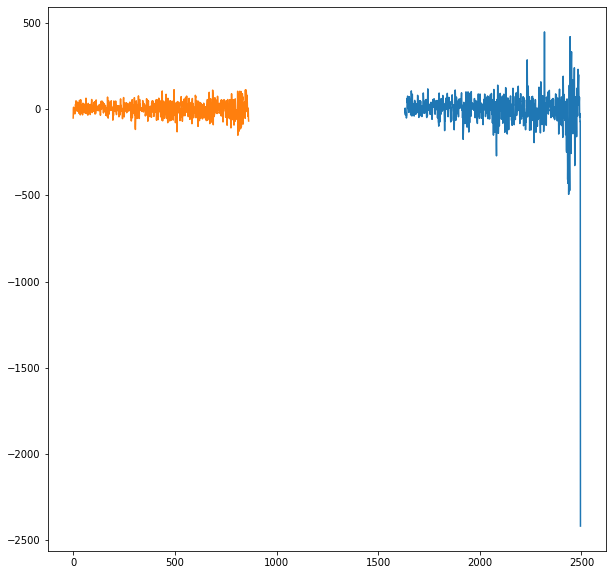

In [132]:
plt.plot(y_test)
plt.plot(predictionsCA1diff)


In [133]:
predictionsCA1diff


array([-5.1567500e+01, -4.0807500e+00,  1.0895750e+01, -2.0748000e+01,
        1.0932500e+00, -1.3526250e+01, -4.4145000e+00, -9.3225000e-01,
       -2.7919500e+01, -1.3862000e+01, -1.5415000e+01,  2.7335000e+01,
        2.6775500e+01,  1.4444500e+01,  4.8064750e+01,  9.1040000e+00,
       -7.4782500e+00,  1.4827500e+01,  2.9122750e+01,  5.0905000e+00,
       -1.2146250e+01,  3.5731750e+01,  4.0691250e+01,  2.1975250e+01,
       -7.3275000e+00, -1.7730000e+00,  5.4482500e+00,  1.7464500e+01,
        2.0171000e+01, -2.4546500e+01,  1.3696000e+01,  5.0975250e+01,
        4.3443750e+01,  3.0997500e+01,  2.1407750e+01, -3.3451000e+01,
        3.0757250e+01,  5.4339250e+01,  9.5525000e-01,  1.1518000e+01,
        2.8237500e+00, -2.1312750e+01,  2.1927750e+01,  2.1732500e+00,
        3.1377500e+00, -1.5551750e+01, -3.3318750e+01,  9.8052500e+00,
        3.4275500e+01,  2.2127750e+01,  9.7575000e+00,  1.5415750e+01,
        1.0227500e+01, -1.9597750e+01, -3.4730000e+00,  2.9240750e+01,
      

In [134]:
y_test

1632     -19.975
1633       5.825
1634     -34.100
1635     -21.500
1636     -24.625
          ...   
2491     -47.750
2492     -25.650
2493     -72.325
2494     -71.625
2495   -2417.900
Name: actualseries, Length: 864, dtype: float64

In [135]:
X=Scaler(lagCA2diff.drop('actualseries',axis=1))
y=lagCA2diff['actualseries']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=False)
RFR.fit(X_train,y_train)
predictionsCA2diff=RFR.predict(X_test)
mean_squared_error(y_test,predictionsCA2diff,squared=False)

80.05136159278989

In [136]:
X=Scaler(lagCA3diff.drop('actualseries',axis=1))
y=lagCA3diff['actualseries']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=False)
RFR.fit(X_train,y_train)
predictionsCA3diff=RFR.predict(X_test)
mean_squared_error(y_test,predictionsCA3diff,squared=False)

61.94932664888314

In [137]:
X=Scaler(lagCD1.drop('actualseries',axis=1))
y=lagCD1['actualseries']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=False)
RFR.fit(X_train,y_train)
predictionsCD1=RFR.predict(X_test)
mean_squared_error(y_test,predictionsCD1,squared=False)

103.07413171004603

In [138]:
X=Scaler(lagCD2.drop('actualseries',axis=1))
y=lagCD2['actualseries']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=False)
RFR.fit(X_train,y_train)
predictionsCD2=RFR.predict(X_test)
mean_squared_error(y_test,predictionsCD2,squared=False)

108.92822890004459

In [139]:
X=Scaler(lagCD3.drop('actualseries',axis=1))
y=lagCD3['actualseries']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=False)
RFR.fit(X_train,y_train)
predictionsCD3=RFR.predict(X_test)
mean_squared_error(y_test,predictionsCD3,squared=False)

137.88434876642626

In [140]:
len(predictionsCA1diff),len(coeff['CA1'])

(864, 2496)

In [141]:
len(coeff['CA1'][1632:2496])

864

In [142]:
CA1=predictionsCA1diff+coeff['CA1'][1632:2496]
CA2=predictionsCA2diff+coeff['CA2'][1632:2496]
CA3=predictionsCA3diff+coeff['CA3'][1632:2496]

In [143]:
predictionsCD1 =predictionsCD1[1:865]
predictionsCD2 =predictionsCD2[1:865]
predictionsCD3 =predictionsCD3[1:865]

In [144]:
closingprice=pywt.iswt([(CA3,predictionsCD3),(CA2,predictionsCD2),(CA1,predictionsCD3)],'haar')

In [146]:
closingprice

array([2598.92205066, 2545.57811713, 2550.45678373, 2545.15978042,
       2577.08181519, 2634.39572459, 2714.32582765, 2833.63535866,
       2811.87247358, 2815.45866736, 2808.37651296, 2830.27128204,
       2859.52144005, 2871.08711035, 2893.43481684, 2904.83951663,
       2908.80415036, 2906.87752977, 2911.62087164, 2931.67145342,
       2938.47670768, 2939.45939932, 2955.25390315, 2983.85786375,
       2977.2952661 , 2971.58594388, 2970.90825452, 2966.52958274,
       2976.76228963, 2986.85239951, 2981.98660495, 3005.87808273,
       3040.03420483, 3049.51007395, 3071.02484442, 3065.76811438,
       3066.67069707, 3105.82965952, 3098.2075297 , 3105.71503622,
       3114.38910627, 3101.64310055, 3104.00451847, 3106.79521687,
       3104.94247811, 3107.9249634 , 3101.18740041, 3111.33759314,
       3133.44140986, 3141.17388271, 3155.96756856, 3157.43546016,
       3152.12675206, 3157.04673959, 3141.19678245, 3151.11182166,
       3162.0696691 , 3140.10625561, 3151.82977207, 3164.21120

In [147]:
dict={'closingprice':closingprice}
closingprice=pd.DataFrame(data=dict)

In [152]:
closingprice['difference']=closingprice['closingprice'].shift(-1)-closingprice['closingprice']

In [154]:
closingprice['direction']=closingprice.apply(lambda x:1 if x["difference"]>0 else (-1 if x["difference"]<0 else 0), axis=1) 

In [166]:
closingprice.dropna(inplace=True)
closingprice


,closingprice,difference,direction
0,2598.922051,-53.343934,-1
1,2545.578117,4.878667,1
2,2550.456784,-5.297003,-1
3,2545.159780,31.922035,1
4,2577.081815,57.313909,1
...,...,...,...
858,3542.230209,-98.175989,-1
859,3444.054219,-114.269411,-1
860,3329.784808,-162.424613,-1
861,3167.360195,-180.813606,-1


In [176]:
closedf=pd.DataFrame(data=close[1635:2498],columns=['close'])
closedf

,close
0,8170.80
1,8221.80
2,8182.45
3,8153.60
4,8139.45
...,...
858,10142.15
859,10167.45
860,10046.65
861,10116.15


In [177]:
closedf['difference']=closedf['close'].shift(-1)-closedf['close']

In [181]:
closedf['direction']=closedf.apply(lambda x:1 if x["difference"]>0 else (-1 if x["difference"]<0 else 0), axis=1) 

In [182]:
closedf

,close,difference,direction
0,8170.80,51.00,1
1,8221.80,-39.35,-1
2,8182.45,-28.85,-1
3,8153.60,-14.15,-1
4,8139.45,-35.10,-1
...,...,...,...
858,10142.15,25.30,1
859,10167.45,-120.80,-1
860,10046.65,69.50,1
861,10116.15,-214.15,-1


In [185]:
accuracy_score(closedf['direction'],closingprice['direction'])

0.6720741599073001